In [40]:
from scipy.stats import binom

n = 2
p = 0.5
k = 1
# gives the probability for k heads in n trials with prob p of landing.
binom.pmf(k, n, p)


0.5000000000000002

In [43]:
import numpy as np

heads = np.arange(n+1)

probs = binom.pmf(heads, n, p)
probs

array([0.25, 0.5 , 0.25])

In [3]:
from empiricaldist import Pmf
pmf_k = Pmf(probs, heads)
pmf_k

NameError: name 'probs' is not defined

In [45]:
def make_binomial(n,p):
    """Calculate binomial pmf"""
    nheads = np.arange(n+1)
    prob = binom.pmf(nheads,n , p)
    return Pmf(prob, nheads)

Text(0, 0.5, 'Number of Heads (k)')

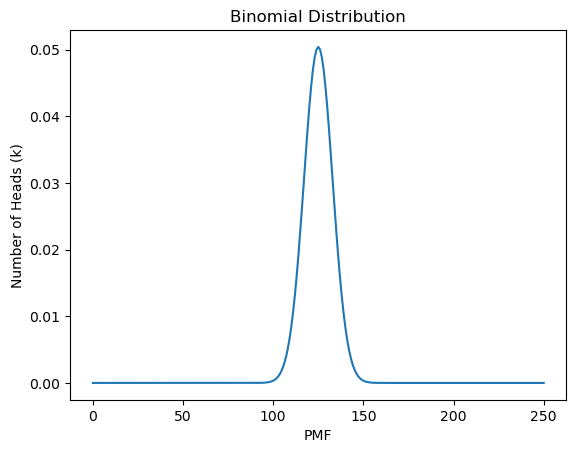

In [48]:
## PMF of getting k heads in n trials with probability p
pmf_k = make_binomial(n=250, p = 0.5)
plt.plot(pmf_k)
plt.title('Binomial Distribution')
plt.xlabel('PMF')
plt.ylabel('Number of Heads (k)')

In [50]:
pmf_k[125] #probability of getting half of the tosses landing in heads

0.050412213147309655

**Note:** A CDF is the probability that X is less than or equal to x 
$$F(a) = P(X \leqq a)$$ 

Equivalently we can search for this same answer by taking the complement of the cdf which is 

$$P(X \geqq a) = 1 - P(X < a) $$

In [51]:
def prob_ge(pmf, threshold):
    """Probability of quantities greater than threshold"""
    return pmf[(pmf.qs >= threshold)].sum()

In [52]:
prob_ge(pmf_k, 140) # probability of getting more than 140 heads pdf

0.03321057562002166

## Bayesian Estimation 

Given the results of head landings, what is the probability it came from a loopsided coin. 

In [13]:
# The hypothesis are in x the proportion of heads
hypos = np.linspace(0,1,101)
hypos

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [4]:
import numpy as np
hypos = np.linspace(0,1,101)
prior = Pmf(1, hypos) # we put 1 as the unnormalized probability and make a uniform prior
prior #uninform prior assumes all values of x are equally likely.

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


In [22]:
prior.normalize()

101

In [8]:
likelihood_heads = hypos #proportions of head 
likelihood_tails = 1 - hypos #1-proportions of head

likelihood = {
    'H' : likelihood_heads,
    'T' : likelihood_tails
}

dataset = 'H'*140 + 'T'*110 #random data set of n = 250

In [6]:
dataset

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

In [7]:
likelihood['H'] 

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [10]:
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T"""
    for data in dataset:
        #for every head we are using the weight 
        pmf *= likelihood[data]
    pmf.normalize()

In [11]:
posterior = prior.copy()
update_euro(posterior,dataset)

In [12]:
posterior

,probs
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
...,...
0.96,2.107677e-83
0.97,1.624102e-96
0.98,2.911941e-115
0.99,9.293081e-148


Text(0, 0.5, 'Probability')

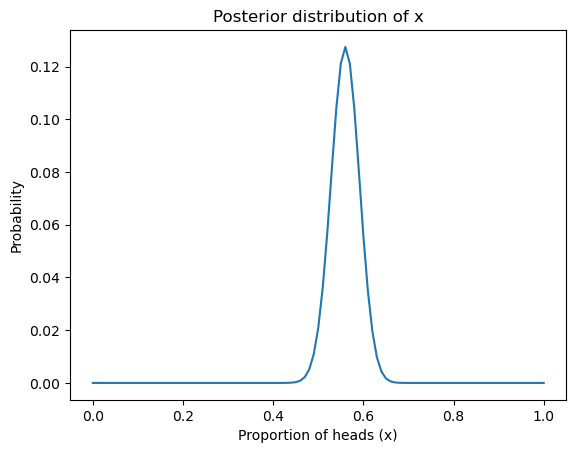

In [13]:
import matplotlib.pyplot as plt
plt.plot(posterior)
plt.title('Posterior distribution of x')
plt.xlabel('Proportion of heads (x)')
plt.ylabel('Probability')

In [14]:
posterior.max_prob()

0.56

## Triangle Shaped Prior
Gives more probability for values close to 0.5 and very low probability to extremes.

In [15]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)

a = np.append(ramp_up, ramp_down)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [16]:
triangle = Pmf(a, hypos, name = 'triangle')
triangle

,probs
0.00,0
0.01,1
0.02,2
0.03,3
0.04,4
...,...
0.96,4
0.97,3
0.98,2
0.99,1


In [17]:
triangle.normalize()

2500

In [18]:
triangle

,probs
0.00,0.0000
0.01,0.0004
0.02,0.0008
0.03,0.0012
0.04,0.0016
...,...
0.96,0.0016
0.97,0.0012
0.98,0.0008
0.99,0.0004


Text(0.5, 0, 'Proportion of Heads (x)')

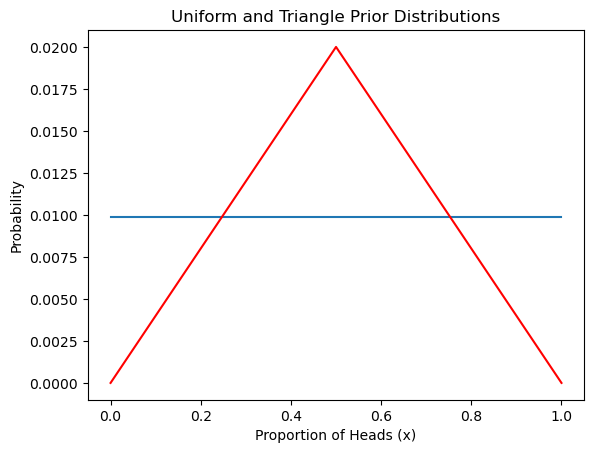

In [25]:
import matplotlib.pyplot as plt

plt.plot(prior)
plt.plot(triangle, 'r')
plt.title('Uniform and Triangle Prior Distributions')
plt.ylabel('Probability')
plt.xlabel('Proportion of Heads (x)')


In [26]:
update_euro(triangle, dataset)

In [28]:
update_euro(prior, dataset)

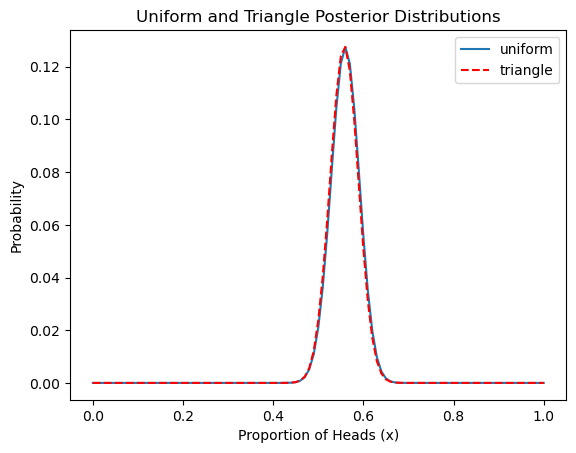

In [32]:
plt.plot(prior, label = 'uniform')
plt.plot(triangle, '--r', label = 'triangle')
plt.title('Uniform and Triangle Posterior Distributions')
plt.ylabel('Probability')
plt.xlabel('Proportion of Heads (x)')
plt.legend()


## Here we are using the data to update our beliefs, so when we compare our posterior distributions we see that with enough data priors tend to converge on the same posterior distribution.